## Job Market Analytics (LinkedIn Jobs – EU)

## Import Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

## Load Dataset

In [28]:
# Load original dataset
df = pd.read_csv("dataset.csv")

print("Original Shape:", df.shape)
df.head()
df.describe()
df.info()

Original Shape: (302, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   linkedin_id        302 non-null    int64 
 1   job_title          302 non-null    object
 2   contract           302 non-null    object
 3   mode               287 non-null    object
 4   city               280 non-null    object
 5   country            302 non-null    object
 6   company            302 non-null    object
 7   sector             302 non-null    object
 8   job_posting_title  302 non-null    object
 9   description        302 non-null    object
 10  linkedin_skills    302 non-null    object
dtypes: int64(1), object(10)
memory usage: 26.1+ KB


## Data Cleaning

In [29]:
# Copy original
df_clean = df.copy()

# 1. Drop duplicates
df_clean.drop_duplicates(inplace=True)

# 2. Handle missing values
# Only "mode" and "city" have missing entries
df_clean['mode'].fillna("Unknown", inplace=True)
df_clean['city'].fillna("Unknown", inplace=True)

# 3. Standardize text fields
text_cols = ['job_title', 'contract', 'mode', 'city', 'country', 'company', 'sector']
for col in text_cols:
    df_clean[col] = df_clean[col].str.strip().str.lower()

# 4. Clean linkedin_skills (split into list later if needed)
df_clean['linkedin_skills'] = df_clean['linkedin_skills'].str.lower().str.strip()

# 5. Reset index
df_clean.reset_index(drop=True, inplace=True)

# Save to new file
df_clean.to_csv("linkedin_jobs_clean.csv", index=False)

print("Original Shape:", df.shape)
print("Cleaned Shape:", df_clean.shape)


Original Shape: (302, 11)
Cleaned Shape: (302, 11)


/tmp/ipython-input-2525081522.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['mode'].fillna("Unknown", inplace=True)
/tmp/ipython-input-2525081522.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

## Load dataset

In [30]:
# Load cleaned dataset
df = pd.read_csv("linkedin_jobs_clean.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (302, 11)


,linkedin_id,job_title,contract,mode,city,country,company,sector,job_posting_title,description,linkedin_skills
0,3629542706,data analyst,full-time,on-site,oldenburg,germany,hanfried personaldienstleistungen gmbh,staffing & recruiting,Data Analyst Finance (m/w/d) in Direktvermittlung,"Personalberatung, -überlassung oder -vermittlu...","visual basic, sql, data visualization, data an..."
1,3580242005,data analyst,full-time,on-site,unknown,italy,telebit spa,telecommunications,LOGISTIC PROCESS & DATA ANALYST,"TELEBIT gruppo italiano moderno, solido, di gr...","analytical skills, data visualization, data an..."
2,3570731003,data specialist,full-time,hybrid,milan,italy,ntt data italia,information technology & services,Data Driven Transformation Specialist,"NTT DATA, Trusted Global Innovator, è tra i pr...","data governance, data analytics, analytics, da..."
3,3587767744,data analyst,full-time,hybrid,prague,czechia,aon,financial services,Junior Data Analyst,"Life is full of risks, from unexpected hurrica...","data visualization, data analytics, visualizat..."
4,3625424422,financial analyst,full-time,on-site,madrid,spain,bnp paribas cib,financial services,Financial Analyst CIB BL STEERING | BNP Pariba...,BNP Paribas EMEA Finance employs 500 employees...,"ad hoc analysis, business requirements, financ..."


## Job Titles Distribution

/tmp/ipython-input-960212790.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.values, y=top_titles.index, palette="viridis")


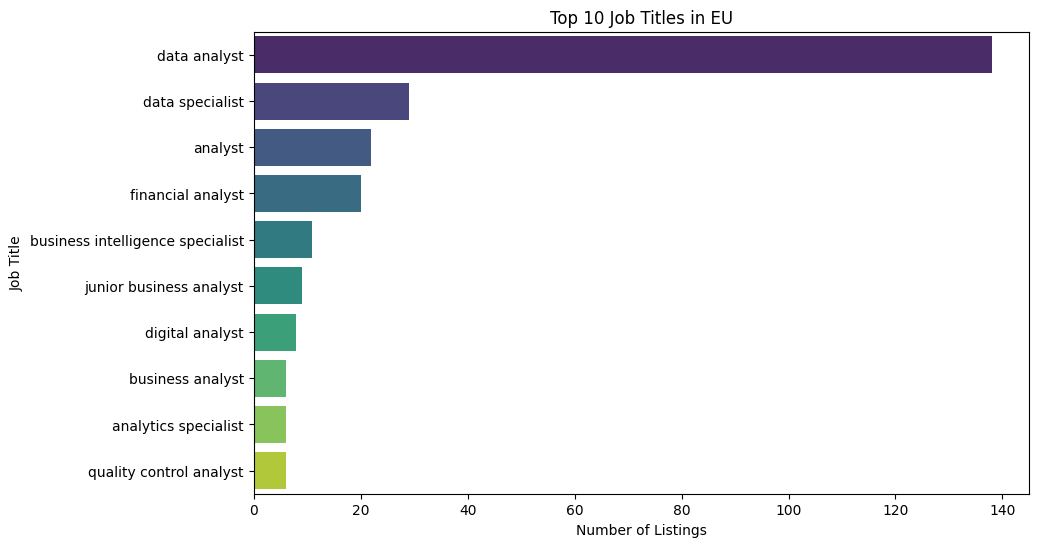

In [31]:
plt.figure(figsize=(10,6))
top_titles = df['job_title'].value_counts().head(10)
sns.barplot(x=top_titles.values, y=top_titles.index, palette="viridis")
plt.title("Top 10 Job Titles in EU")
plt.xlabel("Number of Listings")
plt.ylabel("Job Title")
plt.show()


## Jobs by Country

/tmp/ipython-input-576986122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette="magma")


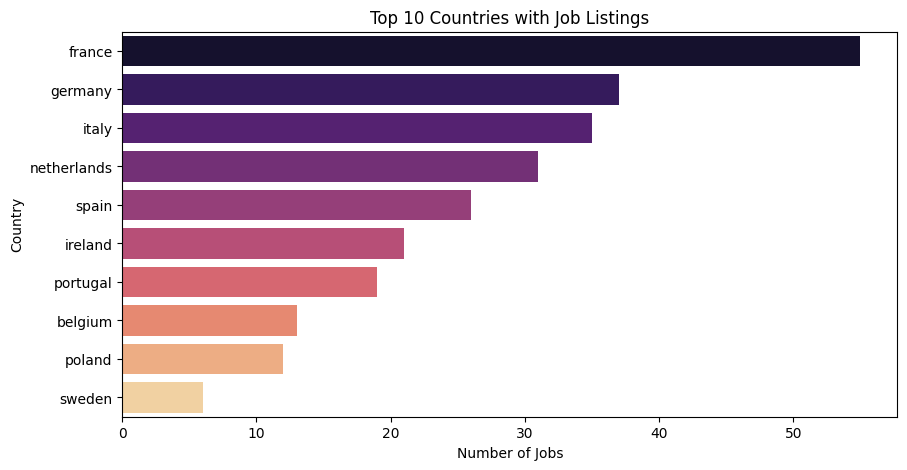

In [32]:
plt.figure(figsize=(10,5))
country_counts = df['country'].value_counts().head(10)
sns.barplot(x=country_counts.values, y=country_counts.index, palette="magma")
plt.title("Top 10 Countries with Job Listings")
plt.xlabel("Number of Jobs")
plt.ylabel("Country")
plt.show()


## Jobs by City

/tmp/ipython-input-1819515289.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.values, y=city_counts.index, palette="coolwarm")


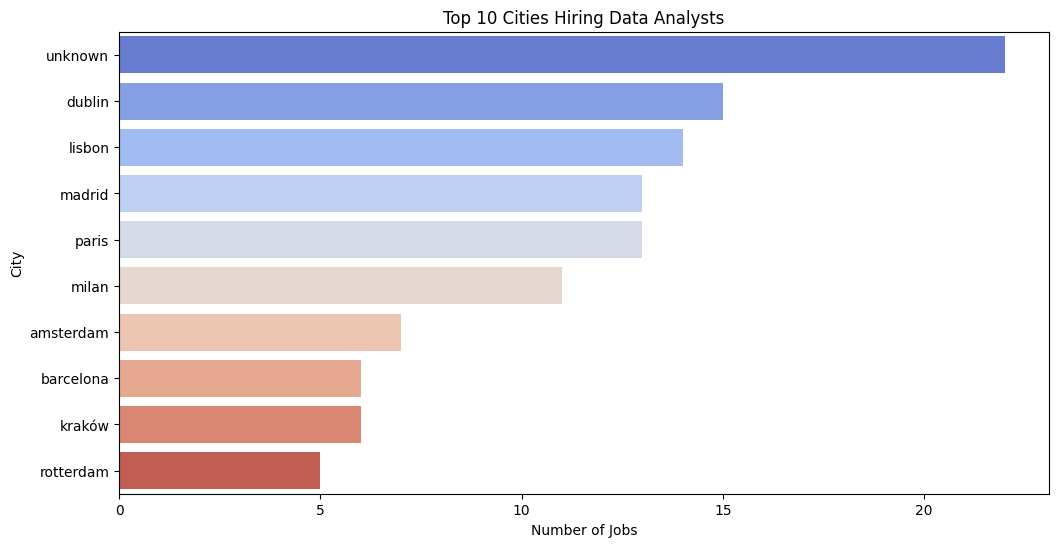

In [33]:
plt.figure(figsize=(12,6))
city_counts = df['city'].value_counts().head(10)
sns.barplot(x=city_counts.values, y=city_counts.index, palette="coolwarm")
plt.title("Top 10 Cities Hiring Data Analysts")
plt.xlabel("Number of Jobs")
plt.ylabel("City")
plt.show()


## Work Mode Distribution

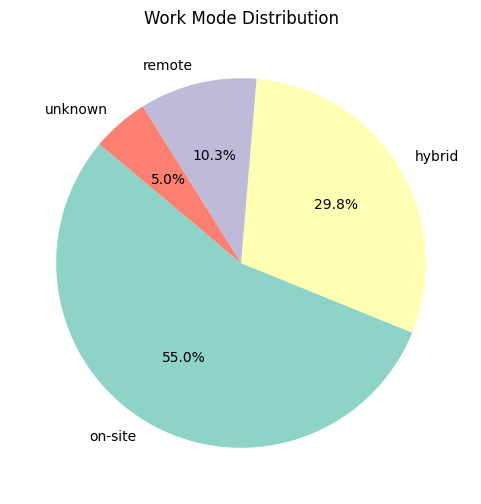

In [34]:
mode_counts = df['mode'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Work Mode Distribution")
plt.show()


## Contract Types

/tmp/ipython-input-3651813420.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="contract", order=df['contract'].value_counts().index, palette="pastel")


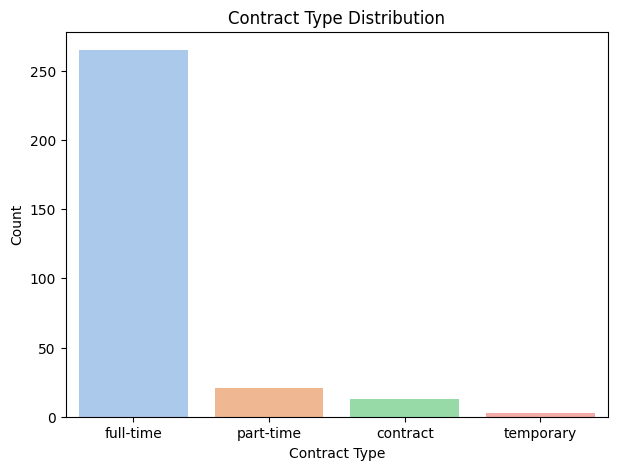

In [35]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="contract", order=df['contract'].value_counts().index, palette="pastel")
plt.title("Contract Type Distribution")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()


## Jobs by Sector

/tmp/ipython-input-3253098577.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_counts.values, y=sector_counts.index, palette="cubehelix")


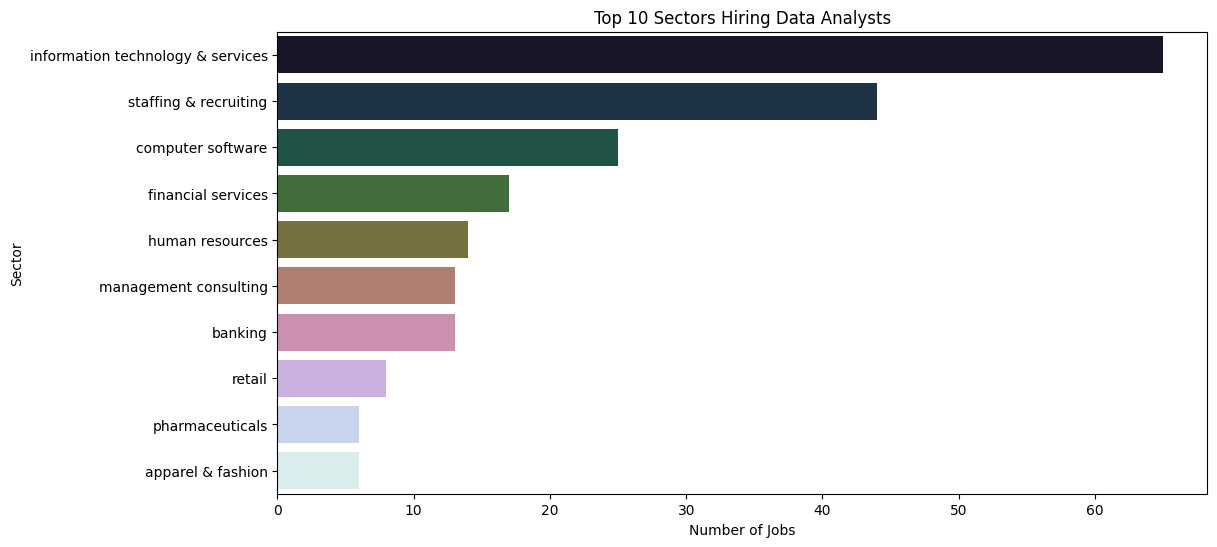

In [36]:
plt.figure(figsize=(12,6))
sector_counts = df['sector'].value_counts().head(10)
sns.barplot(x=sector_counts.values, y=sector_counts.index, palette="cubehelix")
plt.title("Top 10 Sectors Hiring Data Analysts")
plt.xlabel("Number of Jobs")
plt.ylabel("Sector")
plt.show()


## Most Demanded Skills

/tmp/ipython-input-542924286.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skill_counts.values, y=skill_counts.index, palette="viridis")


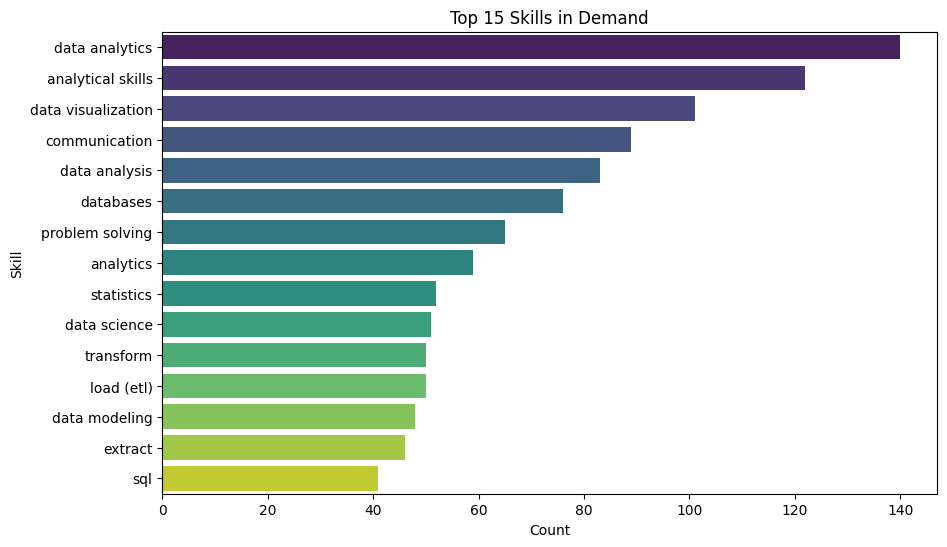

In [37]:
# Flatten skills list
all_skills = [skill for skills in df['linkedin_skills'].dropna() for skill in skills.split(", ")]
skill_counts = pd.Series(all_skills).value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=skill_counts.values, y=skill_counts.index, palette="viridis")
plt.title("Top 15 Skills in Demand")
plt.xlabel("Count")
plt.ylabel("Skill")
plt.show()


## Skills Word Cloud

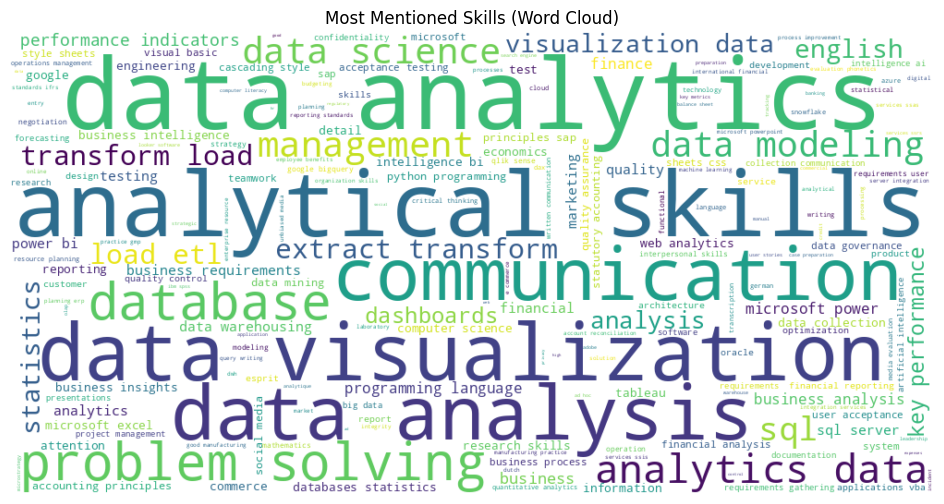

In [38]:
text = " ".join(df['linkedin_skills'].dropna())
wc = WordCloud(width=1000, height=500, background_color="white", colormap="viridis").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Mentioned Skills (Word Cloud)")
plt.show()


## Trend Analysis

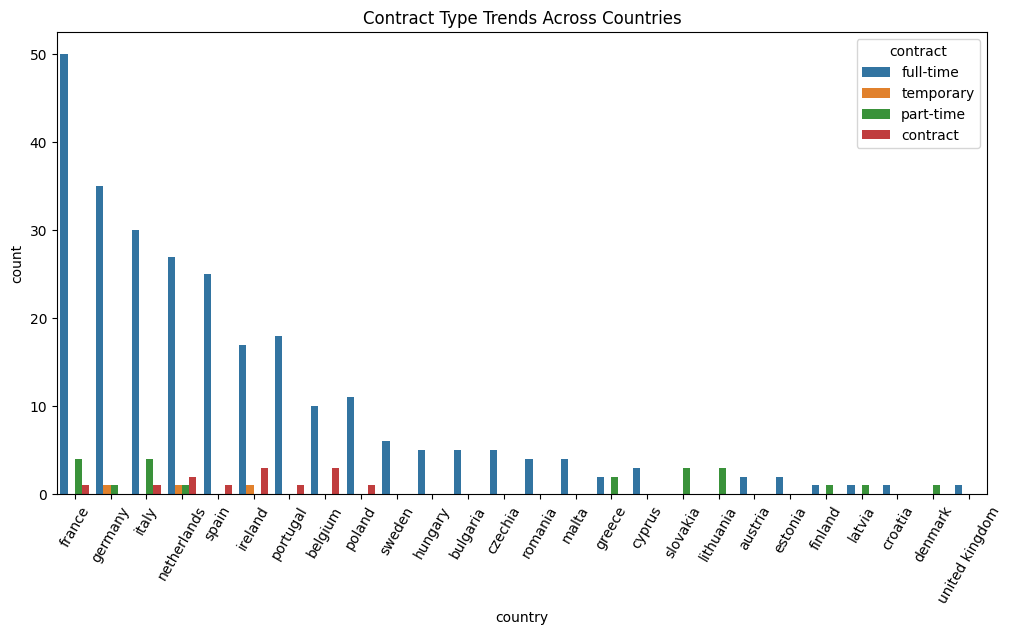

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="country", hue="contract", order=df['country'].value_counts().index)
plt.xticks(rotation=60)
plt.title("Contract Type Trends Across Countries")
plt.show()


## Work Mode Trends Across Countries

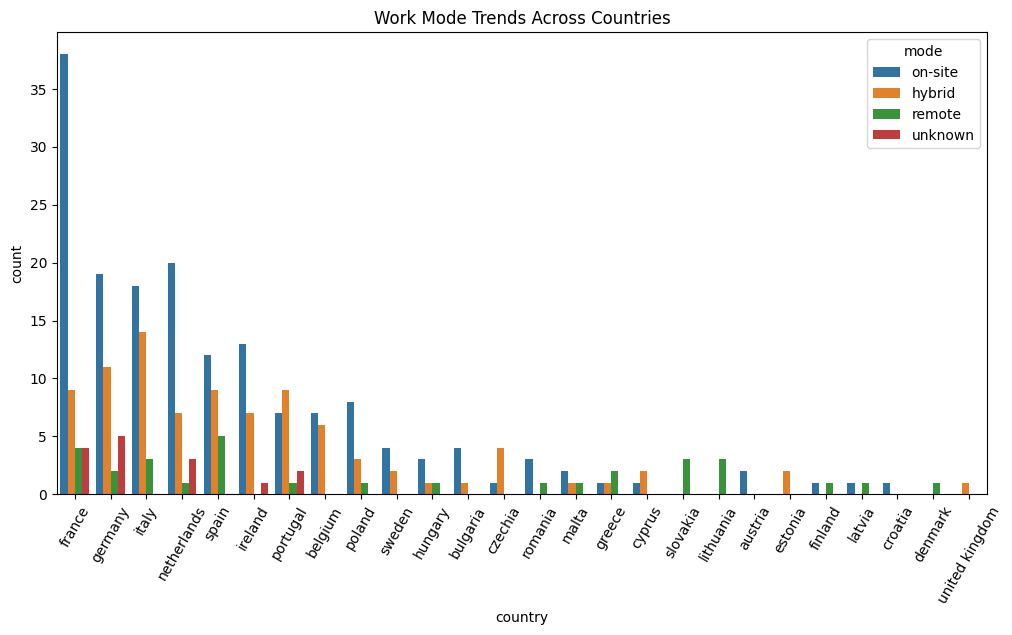

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="country", hue="mode", order=df['country'].value_counts().index)
plt.xticks(rotation=60)
plt.title("Work Mode Trends Across Countries")
plt.show()


## Top Companies Hiring

/tmp/ipython-input-1489340203.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette="magma")


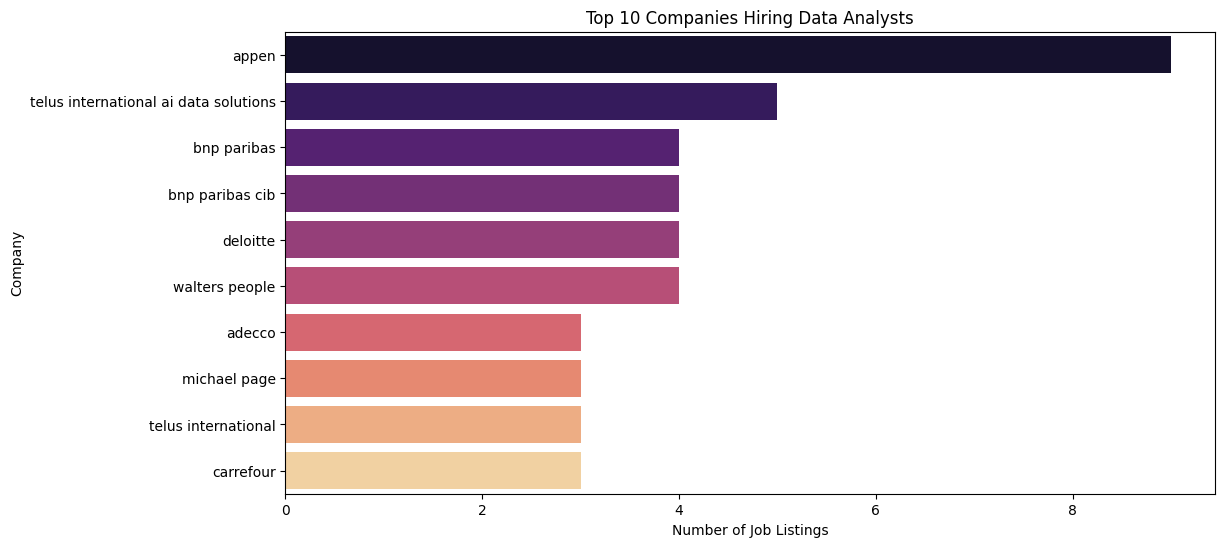

In [41]:
# Top 10 companies hiring
top_companies = df['company'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette="magma")
plt.title("Top 10 Companies Hiring Data Analysts")
plt.xlabel("Number of Job Listings")
plt.ylabel("Company")
plt.show()


## Clustering Skills

In [42]:
top_companies = df['company'].value_counts().head(5).index

for company in top_companies:
    company_skills = df[df['company']==company]['linkedin_skills']
    all_sk = [skill for skills in company_skills for skill in skills.split(", ")]
    skill_counts = pd.Series(all_sk).value_counts().head(5)
    print(f"\nTop Skills for {company}:")
    print(skill_counts)



Top Skills for appen:
communication       8
data collection     7
social media        6
unbiased            6
media evaluation    6
Name: count, dtype: int64

Top Skills for telus international ai data solutions:
english            5
data analysis      5
online research    3
research skills    3
social media       3
Name: count, dtype: int64

Top Skills for bnp paribas:
communication                          4
data analytics                         2
analytical skills                      2
visual basic for applications (vba)    2
tableau                                2
Name: count, dtype: int64

Top Skills for bnp paribas cib:
finance                  2
management accounting    2
visualization            2
data science             2
analytics                2
Name: count, dtype: int64

Top Skills for deloitte:
data analytics        3
analytics             3
data visualization    2
databases             2
data science          2
Name: count, dtype: int64


In [44]:
# Make a copy of the original dataset
df_clean = df.copy()

# 1. Drop duplicates
df_clean.drop_duplicates(inplace=True)

# 2. Handle missing values
df_clean['mode'].fillna("Unknown", inplace=True)
df_clean['city'].fillna("Unknown", inplace=True)

# 3. Standardize text fields
text_cols = ['job_title', 'contract', 'mode', 'city', 'country', 'company', 'sector']
for col in text_cols:
    df_clean[col] = df_clean[col].str.strip().str.lower()

# 4. Clean linkedin_skills
df_clean['linkedin_skills'] = df_clean['linkedin_skills'].str.lower().str.strip()

# 5. Reset index
df_clean.reset_index(drop=True, inplace=True)

# 6. Save the cleaned dataset
df_clean.to_csv("linkedin_jobs.csv", index=False)

print("Cleaned dataset saved successfully as 'linkedin_jobs_clean.csv'")
print("Original Shape:", df.shape)
print("Cleaned Shape:", df_clean.shape)


Cleaned dataset saved successfully as 'linkedin_jobs_clean.csv'
Original Shape: (302, 11)
Cleaned Shape: (302, 11)


/tmp/ipython-input-3908722526.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['mode'].fillna("Unknown", inplace=True)
/tmp/ipython-input-3908722526.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us